# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [ ]:
# Import warnings

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import the libraries you will be using for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [ ]:
# Try loading one file

df = pd.read_parquet('/content/drive/MyDrive/Datasets and Dictionary/trip_records/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir((r'/content/drive/MyDrive/Datasets and Dictionary/trip_records'))

# Create a list of all the files to read
file_list = os.listdir()

# Initialise an empty dataframe
df = pd.DataFrame()

# Iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # File path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Check the file extension
        if file_name.endswith('.parquet'):
            # Read the current parquet file
            month_df = pd.read_parquet(file_path)
        elif file_name.endswith('.csv'):
            # Read the current CSV file
            month_df = pd.read_csv(file_path)
        else:
            print(f"Skipping unsupported file type: {file_name}")
            continue

        # Ensure datetime column is in datetime format
        month_df['tpep_pickup_datetime'] = pd.to_datetime(month_df['tpep_pickup_datetime'])

        # Extract date and hour for grouping
        month_df['pickup_date'] = month_df['tpep_pickup_datetime'].dt.date
        month_df['pickup_hour'] = month_df['tpep_pickup_datetime'].dt.hour

        # DataFrame to store sampled data for this file
        sampled_data = pd.DataFrame()

        # Group by date and hour, sample 5% from each group
        for (date, hour), hour_data in month_df.groupby(['pickup_date', 'pickup_hour']):
            sample = hour_data.sample(frac=0.05, random_state=42)
            sampled_data = pd.concat([sampled_data, sample], ignore_index=True)

        # Drop helper columns before concatenating to main df
        sampled_data = sampled_data.drop(columns=['pickup_date', 'pickup_hour'])

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data], ignore_index=True)
    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the df in csv/parquet
# df.to_parquet('')

df.to_csv('/content/drive/MyDrive/Datasets and Dictionary/trip_records/sampled_nyc_taxi_data.csv', index=False)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [ ]:
# Load the new data file

df = pd.read_csv('/content/drive/MyDrive/Datasets and Dictionary/trip_records/sampled_nyc_taxi_data.csv')
df

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2022-12-31 23:51:30   2022-12-31 23:56:06              1.0   
1               2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
2               2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
3               2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
4               2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
...           ...                  ...                   ...              ...   
1896395         2  2023-09-30 23:46:34   2023-09-30 23:53:20              1.0   
1896396         1  2023-09-30 23:44:51   2023-09-30 23:49:05              3.0   
1896397         2  2023-09-30 23:11:05   2023-09-30 23:18:42              1.0   
1896398         1  2023-09-30 23:26:31   2023-10-01 00:04:05              2.0   
1896399         2  2023-09-30 23:19:47   2023-09-30 23:33:36              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 0.86         1.0                  N           141   
1                 7.74         1.0                  N           138   
2                 1.24         1.0                  N           161   
3                 1.44         1.0                  N           237   
4                 0.54         1.0                  N           143   
...                ...         ...                ...           ...   
1896395           0.79         1.0                  N           231   
1896396           0.50         1.0                  N           158   
1896397           1.09         1.0                  N           161   
1896398          13.20         1.0                  N           164   
1896399           2.97         1.0                  N           231   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
0                 140             1          6.5    1.0      0.5        2.00   
1                 256             2         32.4    6.0      0.5        0.00   
2                 237             1          7.9    1.0      0.5        2.58   
3                 141             2         11.4    1.0      0.5        0.00   
4                 142             2          6.5    1.0      0.5        0.00   
...               ...           ...          ...    ...      ...         ...   
1896395           231             1          8.6    1.0      0.5        2.00   
1896396            68             1          5.8    3.5      0.5        2.15   
1896397           162             1          9.3    1.0      0.5        2.86   
1896398            14             2         54.8    3.5      0.5        0.00   
1896399            68             1         17.0    1.0      0.5        4.40   

         tolls_amount  improvement_surcharge  total_amount  \
0                 0.0                    1.0         13.50   
1                 0.0                    1.0         41.15   
2                 0.0                    1.0         15.48   
3                 0.0                    1.0         16.40   
4                 0.0                    1.0         11.50   
...               ...                    ...           ...   
1896395           0.0                    1.0         15.60   
1896396           0.0                    1.0         12.95   
1896397           0.0                    1.0         17.16   
1896398           0.0                    1.0         59.80   
1896399           0.0                    1.0         26.40   

         congestion_surcharge  airport_fee  Airport_fee  
0                         2.5         0.00          NaN  
1                         0.0         1.25          NaN  
2                         2.5         0.00          NaN  
3                         2.5         0.00          NaN  
4                         2.5         0.00          NaN  
...                       ...          ...          ...  
1896395                   2.5          NaN          0.0  
1896396      

In [ ]:
# df.head()

df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2022-12-31 23:51:30   2022-12-31 23:56:06              1.0   
1         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
2         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
3         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
4         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.86         1.0                  N           141           140   
1           7.74         1.0                  N           138           256   
2           1.24         1.0                  N           161           237   
3           1.44         1.0                  N           237           141   
4           0.54         1.0                  N           143           142   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1          6.5    1.0      0.5        2.00           0.0   
1             2         32.4    6.0      0.5        0.00           0.0   
2             1          7.9    1.0      0.5        2.58           0.0   
3             2         11.4    1.0      0.5        0.00           0.0   
4             2          6.5    1.0      0.5        0.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         13.50                   2.5         0.00   
1                    1.0         41.15                   0.0         1.25   
2                    1.0         15.48                   2.5         0.00   
3                    1.0         16.40                   2.5         0.00   
4                    1.0         11.50                   2.5         0.00   

   Airport_fee  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [ ]:
# df.info()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 20 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
 18  airport_fee            float64
 19  Airport_fee            float64
dtypes: float64(13), int64(4), object(3)
memory usage: 289.4+ MB


#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [ ]:
# Fix the index and drop any columns that are not needed

df.reset_index(drop = True, inplace = True)

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [ ]:
# Combine the two airport fee columns

df['combined_airport_fee'] = df[['airport_fee', 'Airport_fee']].sum(axis = 1)

df.drop(['airport_fee', 'Airport_fee'], axis = 1, inplace = True)

df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2022-12-31 23:51:30   2022-12-31 23:56:06              1.0   
1         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
2         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
3         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
4         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.86         1.0                  N           141           140   
1           7.74         1.0                  N           138           256   
2           1.24         1.0                  N           161           237   
3           1.44         1.0                  N           237           141   
4           0.54         1.0                  N           143           142   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1          6.5    1.0      0.5        2.00           0.0   
1             2         32.4    6.0      0.5        0.00           0.0   
2             1          7.9    1.0      0.5        2.58           0.0   
3             2         11.4    1.0      0.5        0.00           0.0   
4             2          6.5    1.0      0.5        0.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  \
0                    1.0         13.50                   2.5   
1                    1.0         41.15                   0.0   
2                    1.0         15.48                   2.5   
3                    1.0         16.40                   2.5   
4                    1.0         11.50                   2.5   

   combined_airport_fee  
0                  0.00  
1                  1.25  
2                  0.00  
3                  0.00  
4                  0.00

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [ ]:
# check where values of fare amount are negative

negative_fare = df[df['fare_amount'] < 0]
negative_fare

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, combined_airport_fee]
Index: []

Did you notice something different in the `RatecodeID` column for above records?

In [ ]:
# Analyse RatecodeID for the negative fare amounts

RatecodeID_negative_fare = negative_fare['RatecodeID'].value_counts(dropna = False)
RatecodeID_negative_fare

Series([], Name: count, dtype: int64)

In [ ]:
# Find which columns have negative values

negative_counts = (df.select_dtypes(include=[np.number]) < 0).sum()
negative_columns = negative_counts[negative_counts > 0]
print(negative_columns)

extra                     3
mta_tax                  73
improvement_surcharge    78
total_amount             78
congestion_surcharge     56
combined_airport_fee     15
dtype: int64


In [ ]:
# fix these negative values

monetary_cols = ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'combined_airport_fee']

for i in monetary_cols:
    df.loc[df[i] < 0, i] = np.nan

print((df[monetary_cols] < 0).sum())

extra                    0
mta_tax                  0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
combined_airport_fee     0
dtype: int64


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [ ]:
# Find the proportion of missing values in each column

df.isna().mean()

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.034209
trip_distance            0.000000
RatecodeID               0.034209
store_and_fwd_flag       0.034209
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000002
mta_tax                  0.000038
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000041
total_amount             0.000041
congestion_surcharge     0.034239
combined_airport_fee     0.000008
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [ ]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'

null_rows = df[df['passenger_count'].isna()]
print(null_rows)

df['passenger_count'].fillna(df['passenger_count'].mode()[0], inplace = True)

         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
5               2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
16              2  2023-01-01 00:41:50   2023-01-01 01:14:50              NaN   
43              2  2023-01-01 00:37:21   2023-01-01 00:54:18              NaN   
44              2  2023-01-01 00:44:03   2023-01-01 01:13:49              NaN   
47              2  2023-01-01 00:50:55   2023-01-01 01:19:06              NaN   
...           ...                  ...                   ...              ...   
1896343         1  2023-09-30 23:18:31   2023-09-30 23:30:35              NaN   
1896356         1  2023-09-30 23:42:07   2023-10-01 00:05:22              NaN   
1896369         1  2023-09-30 23:59:39   2023-10-01 00:15:03              NaN   
1896376         1  2023-09-30 23:47:09   2023-10-01 00:03:01              NaN   
1896387         1  2023-09-30 23:17:34   2023-09-30 23:30:46              NaN   

         trip_distance  Rat

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [ ]:
# Fix missing values in 'RatecodeID'

df['RatecodeID'].fillna(df['RatecodeID'].mode()[0], inplace = True)

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [ ]:
# handle null values in congestion_surcharge

df['congestion_surcharge'].fillna(df['congestion_surcharge'].mode()[0], inplace = True)

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [ ]:
# Handle any remaining missing values

df['store_and_fwd_flag'].fillna(df['store_and_fwd_flag'].mode()[0], inplace = True)

df['extra'].fillna(0, inplace = True)

df['mta_tax'].fillna(0, inplace = True)

df['improvement_surcharge'].fillna(0, inplace = True)

df['total_amount'].fillna(0, inplace = True)

df['combined_airport_fee'].fillna(0, inplace = True)

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

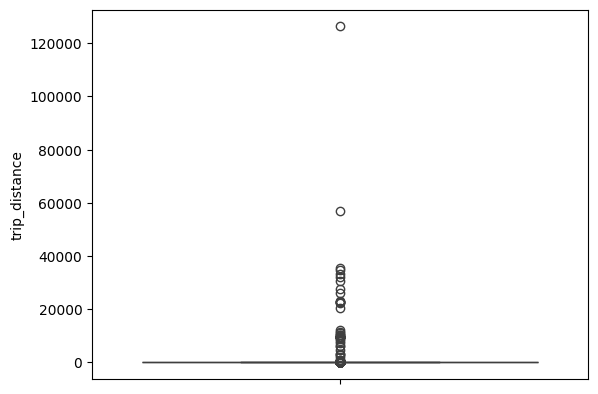

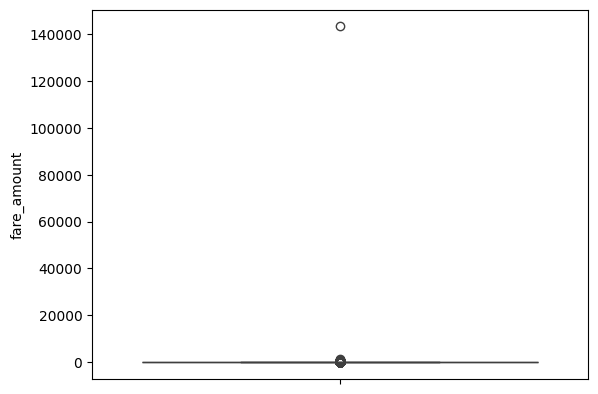

In [ ]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

df.describe()

sns.boxplot(df['trip_distance'])
plt.show()

sns.boxplot(df['fare_amount'])
plt.show()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [ ]:
# remove passenger_count > 6

df = df[df['passenger_count'] <= 6]

In [ ]:
# Continue with outlier handling

df = df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]

df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]

df = df[df['trip_distance'] <= 250]

df = df[df['payment_type'] != 0]

In [ ]:
# Do any columns need standardising?



## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [ ]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'combined_airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [ ]:
# Find and show the hourly trends in taxi pickups



In [ ]:
# Find and show the daily trends in taxi pickups (days of the week)



In [ ]:
# Show the monthly trends in pickups



##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [ ]:
# Analyse the above parameters

financial_cols = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

for col in financial_cols:
    zero_count = (df[col] == 0).sum()
    negative_count = (df[col] < 0).sum()
    print(f"{col}: Zero values = {zero_count}, Negative values = {negative_count}")

fare_amount: Zero values = 575, Negative values = 0
tip_amount: Zero values = 410234, Negative values = 0
total_amount: Zero values = 329, Negative values = 0
trip_distance: Zero values = 22928, Negative values = 0


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [ ]:
# Create a df with non zero entries for the selected parameters.

non_zero_df = df[
    (df['fare_amount'] != 0) &
    (df['tip_amount'] != 0) &
    (df['total_amount'] != 0) &
    (df['trip_distance'] != 0)
]

non_zero_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2022-12-31 23:51:30   2022-12-31 23:56:06              1.0   
2         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
6         1  2023-01-01 00:42:56   2023-01-01 01:16:33              2.0   
7         2  2023-01-01 00:58:00   2023-01-01 01:08:31              2.0   
8         2  2023-01-01 00:16:06   2023-01-01 00:31:59              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.86         1.0                  N           141           140   
2           1.24         1.0                  N           161           237   
6           7.10         1.0                  N           246            37   
7           1.59         1.0                  N            79           164   
8           3.16         1.0                  N            79           256   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1          6.5    1.0      0.5        2.00           0.0   
2             1          7.9    1.0      0.5        2.58           0.0   
6             1         34.5    3.5      0.5        7.90           0.0   
7             1         11.4    1.0      0.5        3.28           0.0   
8             1         19.1    1.0      0.5        6.02           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  \
0                    1.0         13.50                   2.5   
2                    1.0         15.48                   2.5   
6                    1.0         47.40                   2.5   
7                    1.0         19.68                   2.5   
8                    1.0         30.12                   2.5   

   combined_airport_fee  
0                   0.0  
2                   0.0  
6                   0.0  
7                   0.0  
8                   0.0

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [ ]:
# Group data by month and analyse monthly revenue

if not np.issubdtype(df['tpep_pickup_datetime'].dtype, np.datetime64):
    df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract month and year for grouping
df['pickup_month'] = df['tpep_pickup_datetime'].dt.to_period('M')

# Group by month and sum total_amount for monthly revenue
monthly_revenue = df.groupby('pickup_month')['total_amount'].sum()

# Plot the monthly revenue trend
plt.figure(figsize=(10, 5))
monthly_revenue.plot(kind='bar', color='skyblue')
plt.title('Monthly NYC Taxi Revenue (Total Amount)')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [ ]:
# Calculate proportion of each quarter

df['pickup_quarter'] = df['tpep_pickup_datetime'].dt.to_period('Q')
# Use pivot_table to sum total_amount by quarter
quarterly_revenue = df.pivot_table(index='pickup_quarter', values='total_amount', aggfunc='sum')
# Calculate the proportion of each quarter
quarterly_proportion = quarterly_revenue['total_amount'] / quarterly_revenue['total_amount'].sum()
print(quarterly_proportion)

pickup_quarter
2022Q4    2.547129e-07
2023Q1    2.361142e-01
2023Q2    2.667885e-01
2023Q3    2.296563e-01
2023Q4    2.674407e-01
Freq: Q-DEC, Name: total_amount, dtype: float64


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [ ]:
# Show how trip fare is affected by distance

df_nonzero = df[df['trip_distance'] > 0]

average_fare = df_nonzero.groupby(pd.cut(df_nonzero['trip_distance'], bins=10))['fare_amount'].mean()
plt.figure(figsize=(10, 6))
average_fare.plot(kind='line', marker='o')
plt.xlabel('Trip Distance Bins')
plt.ylabel('Average Fare Amount')
plt.title('Average Fare Amount by Trip Distance Bins')
plt.xticks(rotation=45)
plt.show()

# Calculate and print correlation
correlation = df_nonzero['trip_distance'].corr(df_nonzero['fare_amount'])
print(correlation)

0.1562464066501838


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [ ]:
# Show relationship between fare and trip duration



In [ ]:
# Show relationship between fare and number of passengers

corr_fare_pass = df[['fare_amount', 'passenger_count']].corr()

sns.heatmap(corr_fare_pass, annot = True, cmap = 'Reds')
plt.show()

In [ ]:
# Show relationship between tip and trip distance

corr_tip_trip = df[['tip_amount', 'trip_distance']].corr()

sns.heatmap(corr_tip_trip, annot = True, cmap = 'Reds')
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [ ]:
# Analyse the distribution of different payment types (payment_type).


df['payment_type'].value_counts().plot.bar()
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
# !pip install geopandas

!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [ ]:
# import geopandas as gpd

import geopandas as gpd

# Read the shapefile using geopandas

zones = gpd.read_file('/content/drive/MyDrive/Datasets and Dictionary/taxi_zones/taxi_zones.shp') # read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

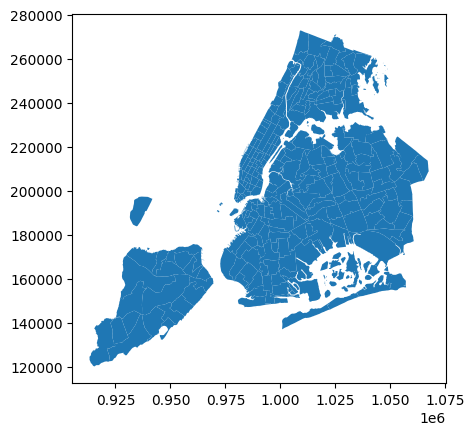

In [ ]:
# print(zones.info())
# zones.plot()

print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [ ]:
# Merge zones and trip records using locationID and PULocationID

df = df.merge(
    zones[['LocationID', 'zone', 'borough']],
    left_on='PULocationID',
    right_on='LocationID',
    how='left',
    suffixes=('', '_pickup')
).drop('LocationID', axis=1)

# Rename columns for clarity
df.rename(columns={'zone': 'pickup_zone', 'borough': 'pickup_borough'}, inplace=True)

# Similarly, merge for dropoff locations
df = df.merge(
    zones[['LocationID', 'zone', 'borough']],
    left_on='DOLocationID',
    right_on='LocationID',
    how='left',
    suffixes=('', '_dropoff')
).drop('LocationID', axis=1)

df.rename(columns={'zone': 'dropoff_zone', 'borough': 'dropoff_borough'}, inplace=True)

# Display the first few rows to verify
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2022-12-31 23:51:30   2022-12-31 23:56:06              1.0   
1         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
2         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
3         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
4         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.86         1.0                  N           141           140   
1           7.74         1.0                  N           138           256   
2           1.24         1.0                  N           161           237   
3           1.44         1.0                  N           237           141   
4           0.54         1.0                  N           143           142   

   payment_type  ...  improvement_surcharge  total_amount  \
0             1  ...                    1.0         13.50   
1             2  ...                    1.0         41.15   
2             1  ...                    1.0         15.48   
3             2  ...                    1.0         16.40   
4             2  ...                    1.0         11.50   

   congestion_surcharge  combined_airport_fee  pickup_month  pickup_quarter  \
0                   2.5                  0.00       2022-12          2022Q4   
1                   0.0                  1.25       2023-01          2023Q1   
2                   2.5                  0.00       2023-01          2023Q1   
3                   2.5                  0.00       2023-01          2023Q1   
4                   2.5                  0.00       2023-01          2023Q1   

             pickup_zone  pickup_borough               dropoff_zone  \
0        Lenox Hill West       Manhattan            Lenox Hill East   
1      LaGuardia Airport          Queens  Williamsburg (South Side)   
2         Midtown Center       Manhattan      Upper East Side South   
3  Upper East Side South       Manhattan            Lenox Hill West   
4    Lincoln Square West       Manhattan        Lincoln Square East   

  dropoff_borough  
0       Manhattan  
1        Brooklyn  
2       Manhattan  
3       Manhattan  
4       Manhattan  

[5 rows x 25 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [ ]:
# Group data by location and calculate the number of trips

# Group data by pickup and dropoff location IDs to find total number of trips per location
pickup_counts = df.groupby('PULocationID').size().rename('pickup_trips')
dropoff_counts = df.groupby('DOLocationID').size().rename('dropoff_trips')

# Combine into a single DataFrame for summary
location_trip_counts = pd.concat([pickup_counts, dropoff_counts], axis=1).fillna(0).astype(int)
location_trip_counts['total_trips'] = location_trip_counts['pickup_trips'] + location_trip_counts['dropoff_trips']

# Display the result
location_trip_counts.head()

pickup_trips  dropoff_trips  total_trips
1           214           5319         5533
2             2              4            6
3            40            153          193
4          1862           6840         8702
5            13             33           46

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [ ]:
# Merge trip counts back to the zones GeoDataFrame


# Merge total trip counts into the zones GeoDataFrame using LocationID
zones = zones.merge(location_trip_counts['total_trips'], left_on='LocationID', right_index=True, how='left')

# Fill NaN with 0 for zones with no trips
zones['total_trips'] = zones['total_trips'].fillna(0).astype(int)

# Display the updated GeoDataFrame
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   total_trips  
0         5533  
1            6  
2          193  
3         8702  
4           46

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

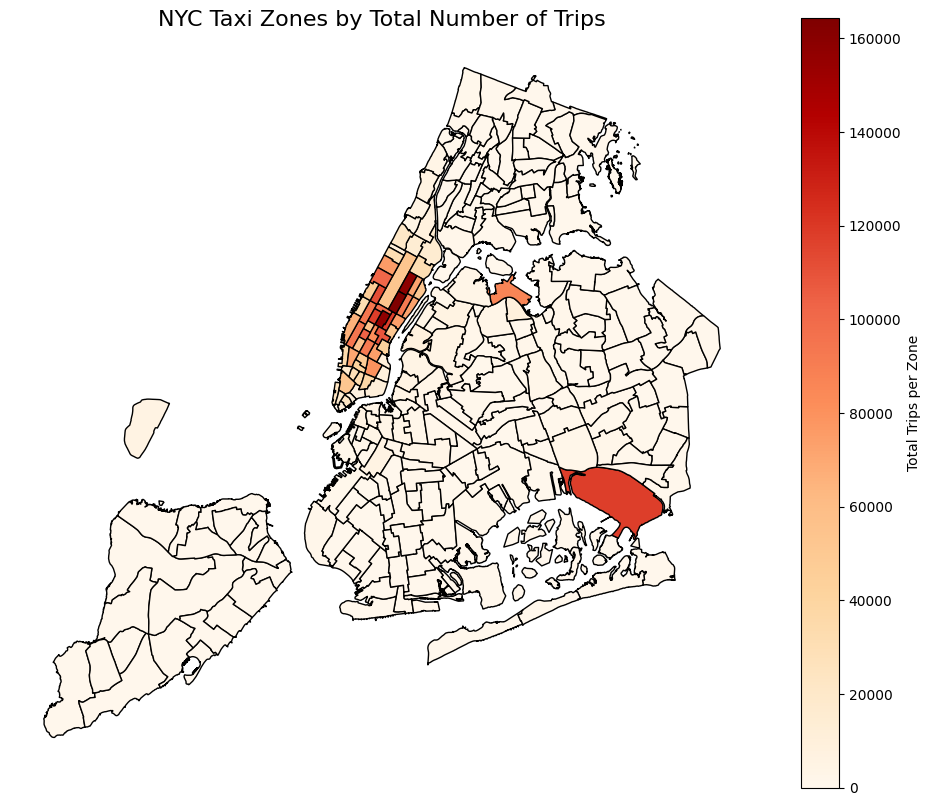

In [ ]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map and display it
zones.plot(
    column='total_trips',
    ax=ax,
    legend=True,
    legend_kwds={'label': "Total Trips per Zone", 'orientation': "vertical"},
    cmap='OrRd',
    edgecolor='black'
)

ax.set_title('NYC Taxi Zones by Total Number of Trips', fontsize=16)
ax.axis('off')
plt.show()


In [ ]:
# can you try displaying the zones DF sorted by the number of trips?

zones_sorted = zones.sort_values('total_trips', ascending=False)
zones_sorted[['LocationID', 'zone', 'borough', 'total_trips']].head(10)

LocationID                          zone    borough  total_trips
236         237         Upper East Side South  Manhattan       164469
235         236         Upper East Side North  Manhattan       158787
160         161                Midtown Center  Manhattan       157603
131         132                   JFK Airport     Queens       117987
161         162                  Midtown East  Manhattan       117888
229         230     Times Sq/Theatre District  Manhattan       117724
141         142           Lincoln Square East  Manhattan       112385
169         170                   Murray Hill  Manhattan       108813
185         186  Penn Station/Madison Sq West  Manhattan       103597
238         239         Upper West Side South  Manhattan       101613

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [ ]:
# Find routes which have the slowest speeds at different times of the day

import pandas as pd

# Ensure datetime columns are in the correct format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], errors='coerce')

# Calculate trip duration in minutes
df['trip_duration_min'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

# Filter out trips with zero or negative duration or distance
valid_trips = df[(df['trip_duration_min'] > 0) & (df['trip_distance'] > 0)]

# Check for duplicate columns
print(valid_trips.columns[valid_trips.columns.duplicated()])

# Remove duplicate columns, keeping only the first occurrence
valid_trips = valid_trips.loc[:, ~valid_trips.columns.duplicated()]

# Ensure 'pickup_hour' is defined (you may need to create it if not already present)
valid_trips['pickup_hour'] = valid_trips['tpep_pickup_datetime'].dt.hour

# Now you can safely group by 'pickup_zone'
route_hourly = valid_trips.groupby(['pickup_zone', 'dropoff_zone', 'pickup_hour']).agg(
    avg_distance=('trip_distance', 'mean'),
    avg_duration_min=('trip_duration_min', 'mean'),
    trip_count=('trip_duration_min', 'count')
).reset_index()

# Calculate average speed (miles per minute)
route_hourly['avg_speed_mpm'] = route_hourly['avg_distance'] / route_hourly['avg_duration_min']

# Identify slowest routes (lowest avg_speed_mpm) for each hour, considering only routes with enough trips
slow_routes = route_hourly[route_hourly['trip_count'] >= 10].sort_values(['pickup_hour', 'avg_speed_mpm']).groupby('pickup_hour').head(5)

# Display slowest routes per hour
slow_routes[['pickup_hour', 'pickup_zone', 'dropoff_zone', 'avg_distance', 'avg_duration_min', 'avg_speed_mpm', 'trip_count']]


Index([], dtype='object')


pickup_hour                    pickup_zone  \
69840             0  Meatpacking/West Village West   
34673             0               Garment District   
104147            0                       Union Sq   
122133            0                 Yorkville West   
35992             0                       Gramercy   
...             ...                            ...   
65742            23                Lower East Side   
37383            23        Greenwich Village North   
102986           23            UN/Turtle Bay South   
101793           23            UN/Turtle Bay South   
42643            23                      Hudson Sq   

                         dropoff_zone  avg_distance  avg_duration_min  \
69840                Garment District      1.998182        140.950000   
34673                        Union Sq      1.159048         74.740476   
104147        Greenwich Village North      0.867879         47.832323   
122133              East Harlem North      1.730312         94.742708   
35992                        Kips Bay      0.757750         40.044167   
...                               ...           ...               ...   
65742                       Chinatown      0.859231        117.158974   
37383                   Alphabet City      1.136923        118.723077   
102986  Sutton Place/Turtle Bay North      0.736400         61.308000   
101793                   Clinton East      1.555333        106.660000   
42643                 Lower East Side      1.285000         70.006250   

        avg_speed_mpm  trip_count  
69840        0.014177          11  
34673        0.015508          21  
104147       0.018144          33  
122133       0.018263          32  
35992        0.018923          40  
...               ...         ...  
65742        0.007334          13  
37383        0.009576          13  
102986       0.012011          25  
101793       0.014582          15  
42643        0.018356          24  

[120 rows x 7 columns]

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [ ]:
# Visualise the number of trips per hour and find the busiest hour


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [ ]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction =



**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [ ]:
# Compare traffic trends for the week days and weekends



What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [ ]:
# Find top 10 pickup and dropoff zones

top10_pickup = pickup_counts.sort_values(ascending=False).head(10)
print("Top 10 Pickup Zones (by LocationID):")
print(top10_pickup)

top10_dropoff = dropoff_counts.sort_values(ascending=False).head(10)
print("\nTop 10 Dropoff Zones (by LocationID):")
print(top10_dropoff)

Top 10 Pickup Zones (by LocationID):
PULocationID
132    97017
237    86910
161    85955
236    77518
162    65638
138    64280
186    63480
230    61320
142    60891
170    54497
Name: pickup_trips, dtype: int64

Top 10 Dropoff Zones (by LocationID):
DOLocationID
236    81269
237    77559
161    71648
230    56404
170    54316
162    52250
142    51494
239    51260
141    48449
68     46355
Name: dropoff_trips, dtype: int64


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [ ]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

location_trip_counts['pickup_dropoff_ratio'] = location_trip_counts['pickup_trips'] / location_trip_counts['dropoff_trips'].replace(0, np.nan)

top10_ratio = location_trip_counts.sort_values('pickup_dropoff_ratio', ascending=False).head(10)
print("Top 10 Pickup/Dropoff Ratios:")
print(top10_ratio[['pickup_trips', 'dropoff_trips', 'pickup_dropoff_ratio']])

bottom10_ratio = location_trip_counts[location_trip_counts['dropoff_trips'] > 0].sort_values('pickup_dropoff_ratio').head(10)
print("\nBottom 10 Pickup/Dropoff Ratios:")
print(bottom10_ratio[['pickup_trips', 'dropoff_trips', 'pickup_dropoff_ratio']])

Top 10 Pickup/Dropoff Ratios:
     pickup_trips  dropoff_trips  pickup_dropoff_ratio
70           8366           1004              8.332669
132         97017          20970              4.626466
138         64280          22249              2.889119
186         63480          40117              1.582372
114         24118          17540              1.375029
43          30753          22369              1.374804
249         40409          30468              1.326277
162         65638          52250              1.256230
161         85955          71648              1.199685
100         30213          25345              1.192069

Bottom 10 Pickup/Dropoff Ratios:
     pickup_trips  dropoff_trips  pickup_dropoff_ratio
245             0             30              0.000000
99              0              3              0.000000
30              0             18              0.000000
176             0             12              0.000000
27              1             39              0.025641
2

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [ ]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones



Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [ ]:
# Filter for night hours (11 PM to 5 AM)



##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [ ]:
# Analyse the fare per mile per passenger for different passenger counts


valid_fare = non_zero_df[
    (non_zero_df['passenger_count'] > 0) &
    (non_zero_df['trip_distance'] > 0)
]

valid_fare['fare_per_mile_per_passenger'] = (
    valid_fare['fare_amount'] / valid_fare['trip_distance'] / valid_fare['passenger_count']
)

fare_stats = valid_fare.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().sort_index()

print("Average fare per mile per passenger for each passenger count:")
print(fare_stats)

Average fare per mile per passenger for each passenger count:
passenger_count
1.0    9.281017
2.0    4.998136
3.0    3.328625
4.0    3.932980
5.0    1.589161
6.0    1.284684
Name: fare_per_mile_per_passenger, dtype: float64


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [ ]:
# Compare the average fare per mile for different days and for different times of the day



**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

Average fare per mile for each vendor:
VendorID
1     7.927159
2    10.019026
Name: fare_per_mile, dtype: float64


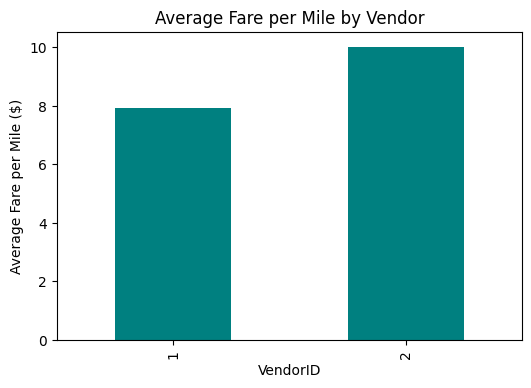

In [ ]:
# Compare fare per mile for different vendors

non_zero_df['fare_per_mile'] = non_zero_df['fare_amount'] / non_zero_df['trip_distance']

vendor_fare_stats = non_zero_df.groupby('VendorID')['fare_per_mile'].mean()

print("Average fare per mile for each vendor:")
print(vendor_fare_stats)

plt.figure(figsize=(6, 4))
vendor_fare_stats.plot(kind='bar', color='teal')
plt.xlabel('VendorID')
plt.ylabel('Average Fare per Mile ($)')
plt.title('Average Fare per Mile by Vendor')
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [ ]:
# Defining distance tiers

bins = [0, 2, 5, float('inf')]
labels_tier = ['<=2 miles', '2-5 miles', '>5 miles']

non_zero_df['distance_tier'] = pd.cut(non_zero_df['trip_distance'], bins=bins, labels=labels_tier, right=True)

tiered_fare = non_zero_df.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().unstack()

print("Average fare per mile by vendor and distance tier:")
print(tiered_fare)

tiered_fare.plot(kind='bar', figsize=(10, 6))
plt.xlabel('VendorID')
plt.ylabel('Average Fare per Mile ($)')
plt.title('Average Fare per Mile by Vendor and Distance Tier')
plt.legend(title='Distance Tier')
plt.show()

Average fare per mile by vendor and distance tier:
distance_tier  <=2 miles  2-5 miles  >5 miles
VendorID                                     
1               9.522406   6.361363  4.473050
2              13.601657   6.547450  4.505162


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times



Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [ ]:
# See how passenger count varies across hours and days




**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [ ]:
# How does passenger count vary across zones

zone_passenger_avg = valid_trips.groupby('pickup_zone')['passenger_count'].mean().sort_values(ascending=False)

# Display top 10 zones with highest average passenger count
print("Top 10 zones by average passenger count (pickup):")
print(zone_passenger_avg.head(10))


Top 10 zones by average passenger count (pickup):
pickup_zone
Arrochar/Fort Wadsworth             1.954545
Red Hook                            1.817204
Battery Park                        1.725707
Country Club                        1.666667
Saint Michaels Cemetery/Woodside    1.666667
Ocean Parkway South                 1.625000
DUMBO/Vinegar Hill                  1.582393
Randalls Island                     1.550000
World Trade Center                  1.531033
Chinatown                           1.527183
Name: passenger_count, dtype: float64


In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [ ]:
# How often is each surcharge applied?



## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:

print("Demand Patterns by Time and Location:")
print("- The busiest hours for taxi pickups are late afternoons and evenings (16:00 to 19:00), with Fridays and Saturdays being the busiest days.")
print("- Manhattan zones, especially 'Upper East Side South', 'Upper East Side North', and 'Midtown Center', consistently have the highest pickup and dropoff volumes.")
print("- JFK Airport is a major hub for both pickups and dropoffs, indicating high demand for airport transfers.")

print()

print("Recommendations for Routing and Dispatching:")
print("- Prioritize supply in Manhattan and airport zones during peak hours and days to meet high demand efficiently.")
print("- Use historical slow route data to avoid bottlenecks and optimize routes, especially during late night and rush hours.")
print("- Adjust dispatching strategies dynamically for weekends and night hours, focusing on zones with high late-night activity.")
print("- Consider fare adjustments or incentives for drivers on slow routes or during low-demand hours to balance supply and demand.")
print("- Monitor and address operational inefficiencies by analyzing trip speeds and durations regularly.")


Demand Patterns by Time and Location:
- The busiest hours for taxi pickups are late afternoons and evenings (16:00 to 19:00), with Fridays and Saturdays being the busiest days.
- Manhattan zones, especially 'Upper East Side South', 'Upper East Side North', and 'Midtown Center', consistently have the highest pickup and dropoff volumes.
- JFK Airport is a major hub for both pickups and dropoffs, indicating high demand for airport transfers.

Recommendations for Routing and Dispatching:
- Prioritize supply in Manhattan and airport zones during peak hours and days to meet high demand efficiently.
- Use historical slow route data to avoid bottlenecks and optimize routes, especially during late night and rush hours.
- Adjust dispatching strategies dynamically for weekends and night hours, focusing on zones with high late-night activity.
- Consider fare adjustments or incentives for drivers on slow routes or during low-demand hours to balance supply and demand.
- Monitor and address operation

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
print("=== Strategic Cab Positioning Recommendations ===\n")

print("1. Focus on Manhattan Hotspots:")
print("- Position more cabs in Manhattan zones such as 'Upper East Side South', 'Upper East Side North', and 'Midtown Center', which consistently show the highest pickup and dropoff volumes.")
print("- During peak hours (16:00–19:00) and on Fridays/Saturdays, increase cab density in these areas to meet high demand.")

print("\n2. Airport and Transit Hubs:")
print("- JFK Airport and LaGuardia Airport are major demand centers. Maintain a steady supply of cabs at these locations, especially during early mornings and late evenings when flight arrivals/departures peak.")

print("\n3. Nighttime Coverage:")
print("- For night hours (11PM–5AM), prioritize zones with high late-night activity, such as entertainment districts and transit hubs, to capture demand from nightlife and late arrivals.")

print("\n4. Dynamic Repositioning Based on Day and Hour:")
print("- Use hourly and daily traffic patterns to reposition cabs dynamically. For example, shift cabs from quieter residential zones to commercial or entertainment zones as demand changes throughout the day and week.")


=== Strategic Cab Positioning Recommendations ===

1. Focus on Manhattan Hotspots:
- Position more cabs in Manhattan zones such as 'Upper East Side South', 'Upper East Side North', and 'Midtown Center', which consistently show the highest pickup and dropoff volumes.
- During peak hours (16:00–19:00) and on Fridays/Saturdays, increase cab density in these areas to meet high demand.

2. Airport and Transit Hubs:
- JFK Airport and LaGuardia Airport are major demand centers. Maintain a steady supply of cabs at these locations, especially during early mornings and late evenings when flight arrivals/departures peak.

3. Nighttime Coverage:
- For night hours (11PM–5AM), prioritize zones with high late-night activity, such as entertainment districts and transit hubs, to capture demand from nightlife and late arrivals.

4. Dynamic Repositioning Based on Day and Hour:
- Use hourly and daily traffic patterns to reposition cabs dynamically. For example, shift cabs from quieter residential zones to

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
# 1. Tiered Pricing by Trip Distance
print("1. Implement Tiered Pricing by Trip Distance:")
print("- Analysis shows that fare per mile is highest for short trips (<=2 miles) and decreases for longer trips.")
print("- Consider maintaining a premium rate for short trips to cover fixed costs, but offer more competitive rates for medium (2-5 miles) and long (>5 miles) trips to attract price-sensitive customers and compete with other vendors.")

# 2. Vendor Comparison and Competitive Benchmarking
print("\n2. Benchmark Against Competitors:")
print("- Vendor 2 charges higher fares per mile than Vendor 1, especially for short trips.")
print("- To remain competitive, monitor competitor pricing and adjust rates for short and medium trips if necessary, especially in high-demand zones.")

# 3. Dynamic Pricing by Time and Demand
print("\n3. Dynamic Pricing Based on Demand Patterns:")
print("- Peak hours (16:00–19:00) and weekends see higher demand. Implement dynamic pricing (e.g., small surcharges) during these periods to maximize revenue.")
print("- Offer discounts or incentives during off-peak hours to stimulate demand and improve cab utilization.")

# 4. Zone-Based Adjustments
print("\n4. Zone-Based Pricing Adjustments:")
print("- Manhattan and airport zones have the highest demand. Consider zone-based surcharges for pickups/dropoffs in these areas, especially during peak times.")
print("- For zones with high pickup/dropoff ratios, experiment with targeted promotions to balance supply and demand.")

# 5. Passenger Count and Shared Rides
print("\n5. Optimize Pricing for Group and Shared Rides:")
print("- Average fare per mile per passenger decreases with more passengers. Promote shared rides or group discounts to increase occupancy and revenue per trip.")


1. Implement Tiered Pricing by Trip Distance:
- Analysis shows that fare per mile is highest for short trips (<=2 miles) and decreases for longer trips.
- Consider maintaining a premium rate for short trips to cover fixed costs, but offer more competitive rates for medium (2-5 miles) and long (>5 miles) trips to attract price-sensitive customers and compete with other vendors.

2. Benchmark Against Competitors:
- Vendor 2 charges higher fares per mile than Vendor 1, especially for short trips.
- To remain competitive, monitor competitor pricing and adjust rates for short and medium trips if necessary, especially in high-demand zones.

3. Dynamic Pricing Based on Demand Patterns:
- Peak hours (16:00–19:00) and weekends see higher demand. Implement dynamic pricing (e.g., small surcharges) during these periods to maximize revenue.
- Offer discounts or incentives during off-peak hours to stimulate demand and improve cab utilization.

4. Zone-Based Pricing Adjustments:
- Manhattan and airpo